# Car Price Prediction Assignment.

# Objective: Examine car pricing factors such as brand, mileage, and year of manufacture.

Source => https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

In [56]:
# Load and Inspect the Dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
df = pd.read_csv('/content/sample_data/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [57]:
# Check for Missing Values.
# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [58]:
# Display column types
print(df.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [59]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


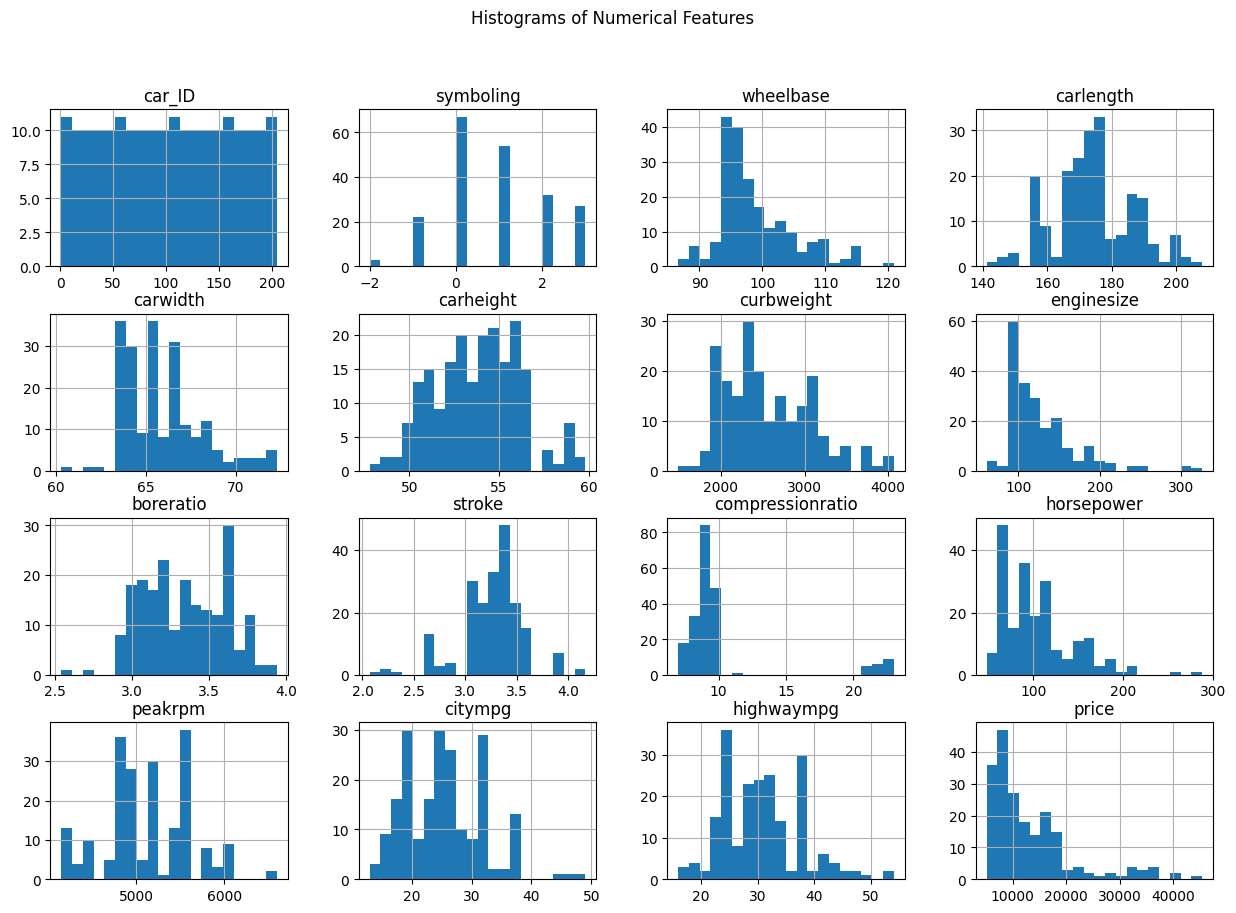

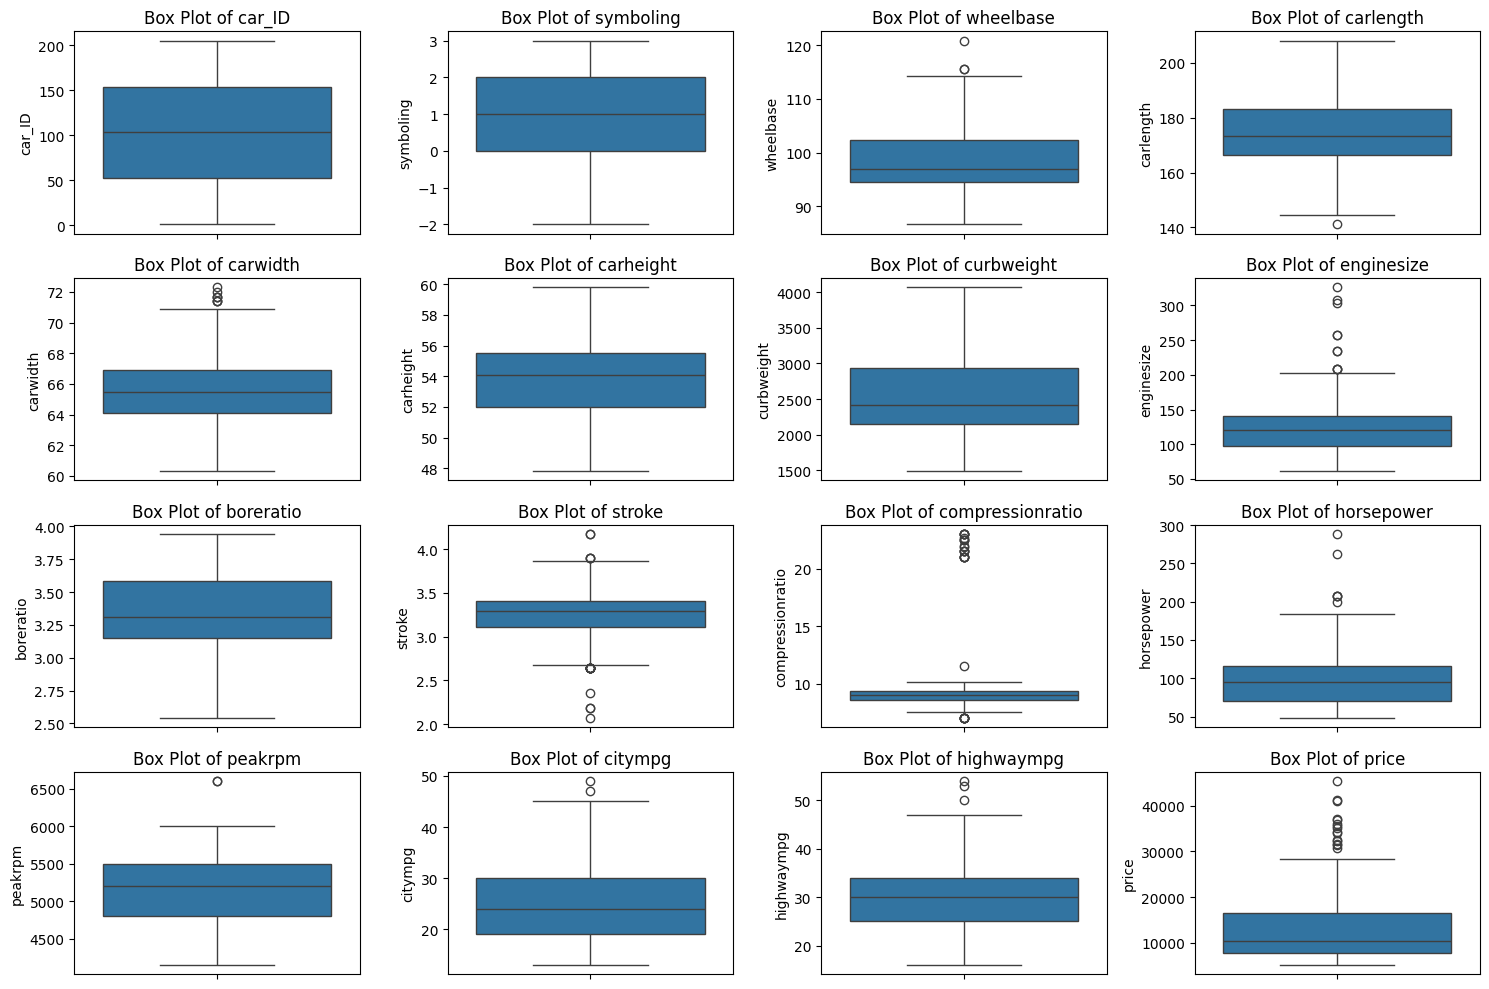

In [60]:
# Exploratory Data Analysis (EDA).

# Histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Box plots for numerical features to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

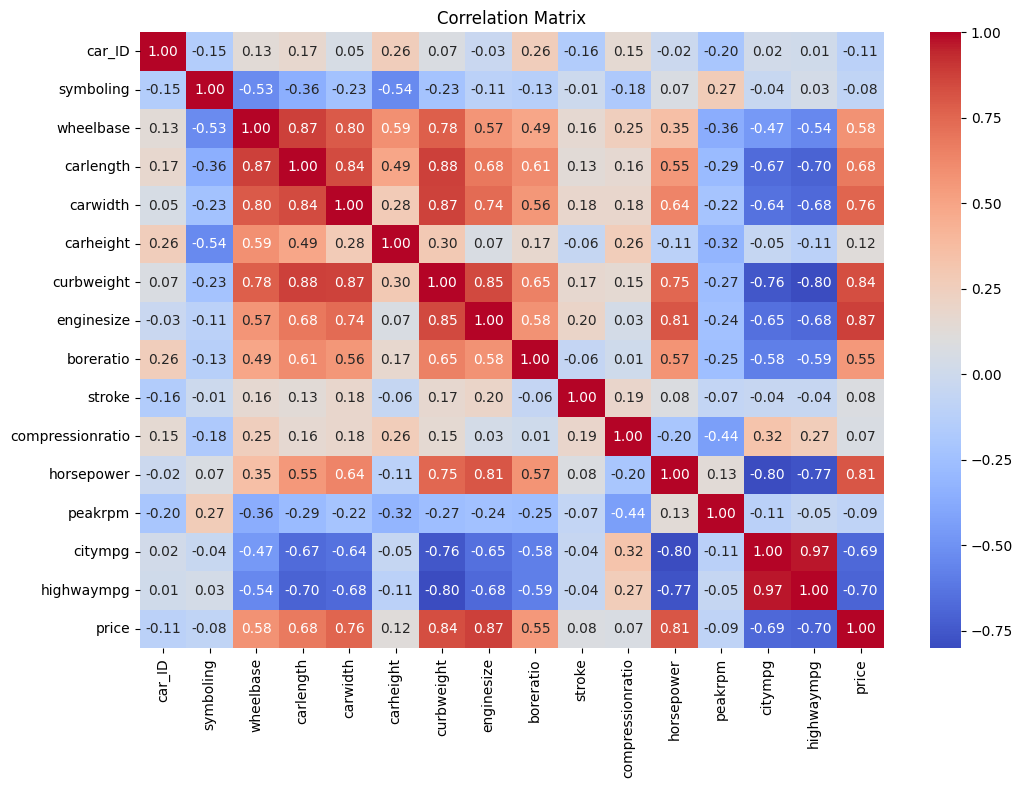

In [61]:
# Assess Relationships Between Numerical Variables.
# Correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


Highly Correlated Pairs:
highwaympg  citympg       0.971337
carlength   curbweight    0.877728
wheelbase   carlength     0.874587
price       enginesize    0.874145
carwidth    curbweight    0.867032
curbweight  enginesize    0.850594
carlength   carwidth      0.841118
curbweight  price         0.835305
horsepower  enginesize    0.809769
            price         0.808139
carwidth    wheelbase     0.795144
wheelbase   curbweight    0.776386
carwidth    price         0.759325
horsepower  curbweight    0.750739
enginesize  carwidth      0.735433
            carlength     0.683360
carlength   price         0.682920
curbweight  boreratio     0.648480
carwidth    horsepower    0.640732
boreratio   carlength     0.606454
wheelbase   carheight     0.589435
enginesize  boreratio     0.583774
price       wheelbase     0.577816
boreratio   horsepower    0.573677
enginesize  wheelbase     0.569329
boreratio   carwidth      0.559150
price       boreratio     0.553173
carlength   horsepower    0.5

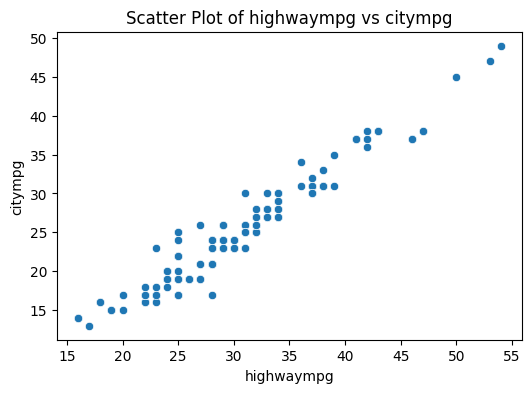

In [62]:
# Scatter plots for highly correlated variables
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.5) & (high_corr_pairs < 1)]
print("\nHighly Correlated Pairs:")
print(high_corr_pairs)

# Example scatter plot for one pair
if len(high_corr_pairs) > 0:
    x, y = high_corr_pairs.index[0]
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f"Scatter Plot of {x} vs {y}")
    plt.show()


Frequency Table for CarName:
CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64


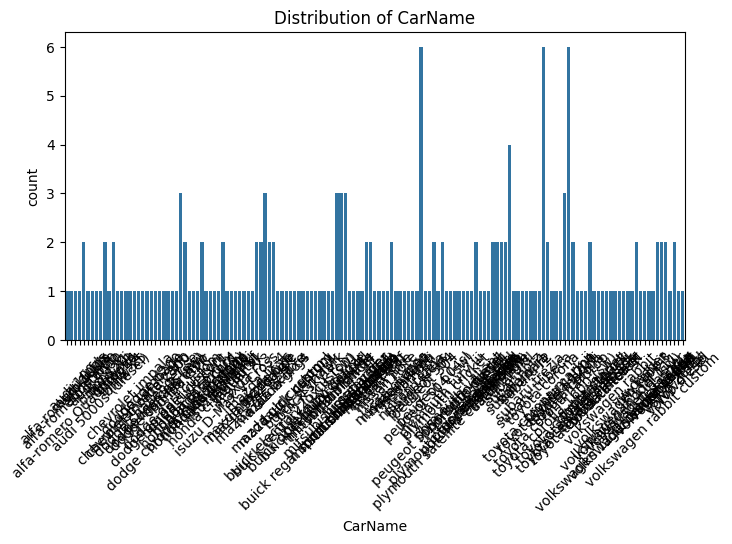


Frequency Table for fueltype:
fueltype
gas       185
diesel     20
Name: count, dtype: int64


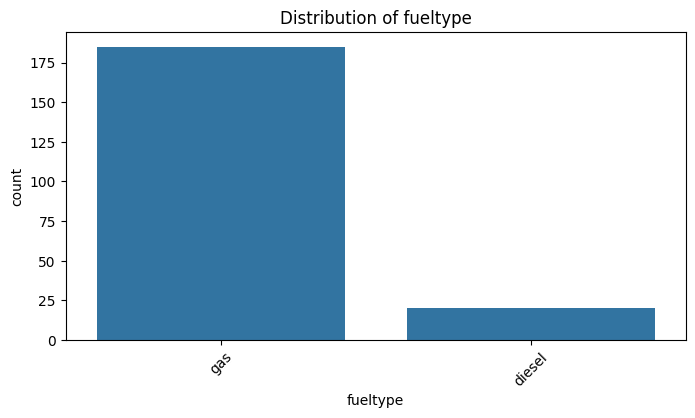


Frequency Table for aspiration:
aspiration
std      168
turbo     37
Name: count, dtype: int64


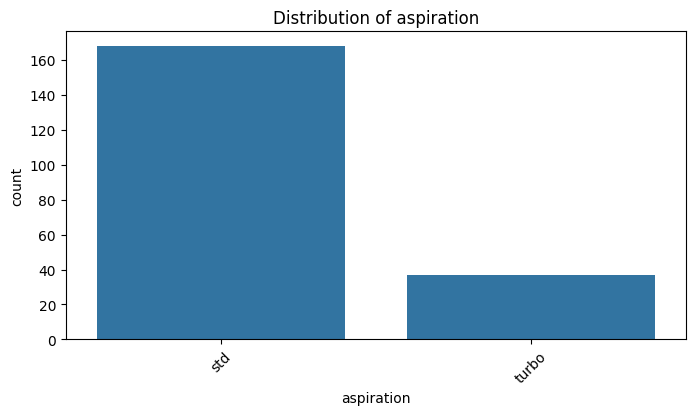


Frequency Table for doornumber:
doornumber
four    115
two      90
Name: count, dtype: int64


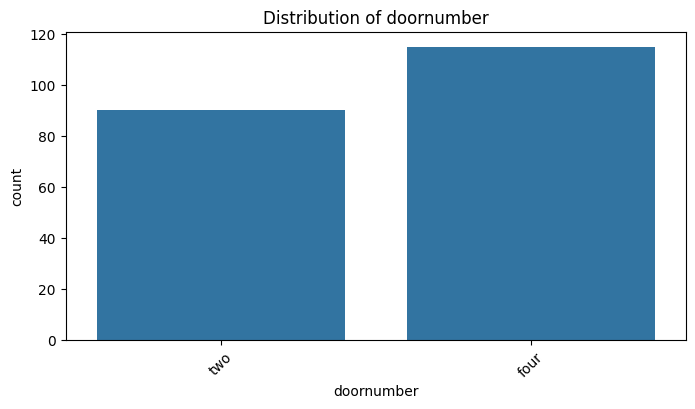


Frequency Table for carbody:
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


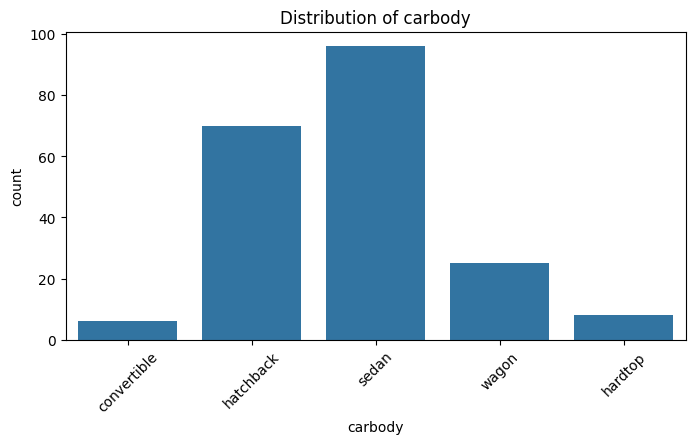


Frequency Table for drivewheel:
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


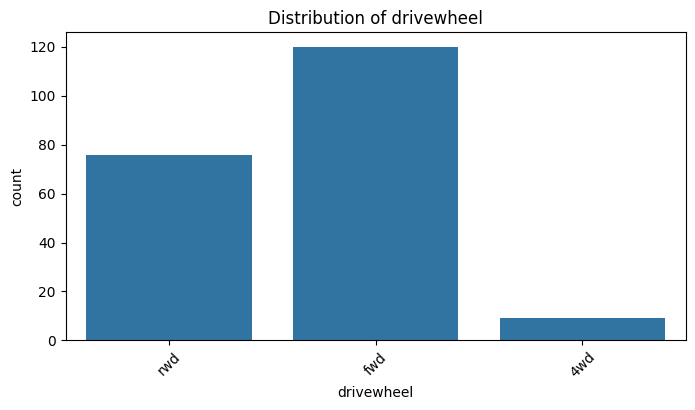


Frequency Table for enginelocation:
enginelocation
front    202
rear       3
Name: count, dtype: int64


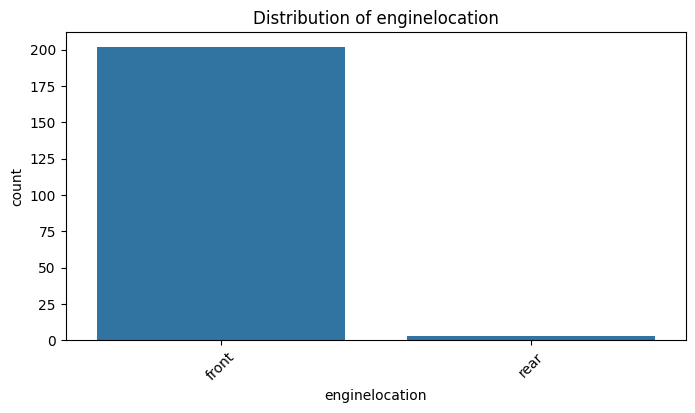


Frequency Table for enginetype:
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


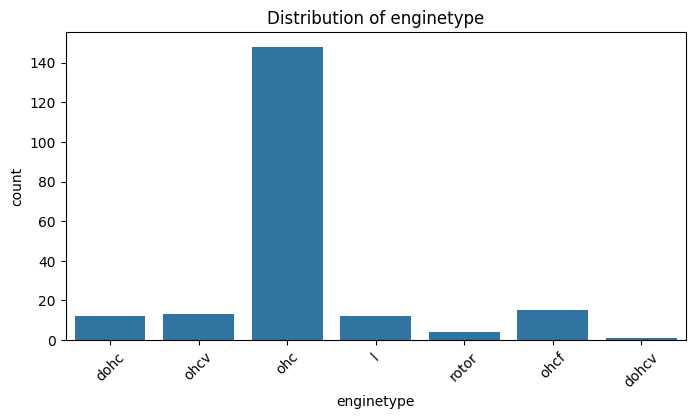


Frequency Table for cylindernumber:
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


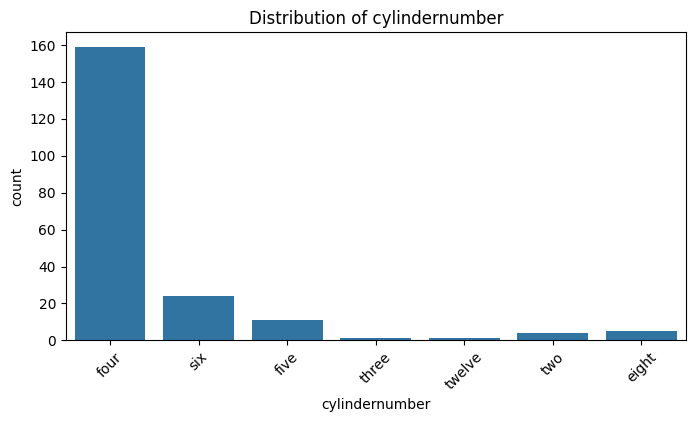


Frequency Table for fuelsystem:
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


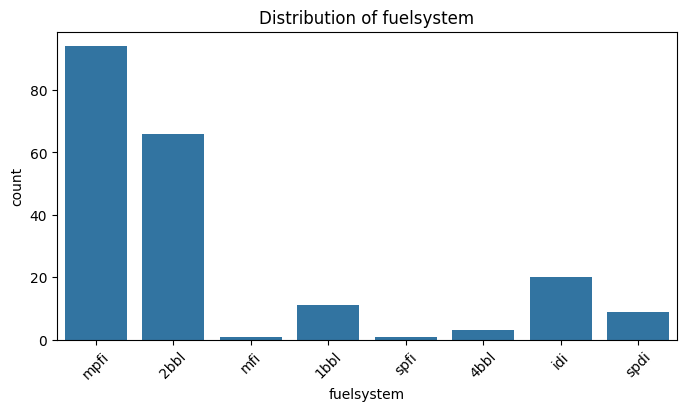

In [63]:
# Analyze Categorical Data
# Frequency tables and bar plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns

for column in categorical_features:
    print(f"\nFrequency Table for {column}:")
    print(df[column].value_counts())

    # Bar plot for categorical variables
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

In [64]:
# Handle Missing Values.
# If missing values exist, handle them appropriately
# Example: Fill missing numerical values with median
for col in numerical_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Example: Fill missing categorical values with mode
for col in categorical_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [65]:
# Normalize/Standardize Numerical Features.
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [66]:
# Feature Selection.
# Use correlation analysis or feature importance techniques to select relevant features
# Example: Drop features with low correlation to the target variable
low_corr_features = [col for col in numerical_features if abs(correlation_matrix['price'][col]) < 0.1]
df.drop(columns=low_corr_features, inplace=True)

Encode Categorical Variables
You can encode categorical variables using one of the following methods:

Label Encoding : Assigns a unique integer to each category.
One-Hot Encoding : Creates binary columns for each category.
For this dataset, we'll use one-hot encoding since it avoids introducing ordinal relationships between categories.

In [67]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the updated dataset
print("\nEncoded Dataset:")
print(df_encoded.head())


Encoded Dataset:
     car_ID  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.723622  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1 -1.706724  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2 -1.689826  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3 -1.672928   0.173698   0.207256  0.136542   0.235942   -0.420797   
4 -1.656029   0.107110   0.207256  0.230001   0.235942    0.516807   

   enginesize  boreratio  horsepower   citympg  ...  cylindernumber_three  \
0    0.074449   0.519071    0.174483 -0.646553  ...                 False   
1    0.074449   0.519071    0.174483 -0.646553  ...                 False   
2    0.604046  -2.404880    1.264536 -0.953012  ...                 False   
3   -0.431076  -0.517266   -0.053668 -0.186865  ...                 False   
4    0.218885  -0.517266    0.275883 -1.106241  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False         

In [68]:
# Step 3: Split the Data
# After encoding, split the data into training and testing sets.
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns=['price'])  # Features (all columns except 'price')
y = df_encoded['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Step 4: Train the Model
# Now that the data is fully numerical, you can train the linear regression model.
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Model Evaluation:
Mean Squared Error (MSE): 0.97
R-squared (R2): 0.22


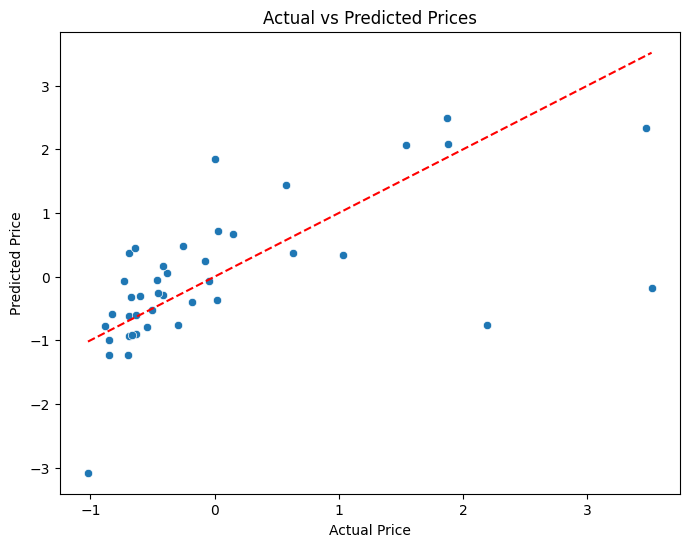

In [70]:
# Step 5: Evaluate the Model
# Evaluate the model's performance using metrics like Mean Squared Error (MSE) and R-squared (R²).
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize actual vs predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()